## 18 - Skew-t Fiducial Lines

[Youtube](https://www.youtube.com/watch?v=quFXzaNbWXM)

In [1]:
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units
import numpy as np
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
import metpy.plots as plots

In [2]:
date = datetime(2017, 9, 10, 0)
station = 'BMX'
df = WyomingUpperAir.request_data(date, station)

In [3]:
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u = df['u_wind'].values * units(df.units['u_wind'])
v = df['v_wind'].values * units(df.units['v_wind'])

In [4]:
interval = np.logspace(2, 3) * units.hPa
idx = mpcalc.resample_nn_1d(p, interval)

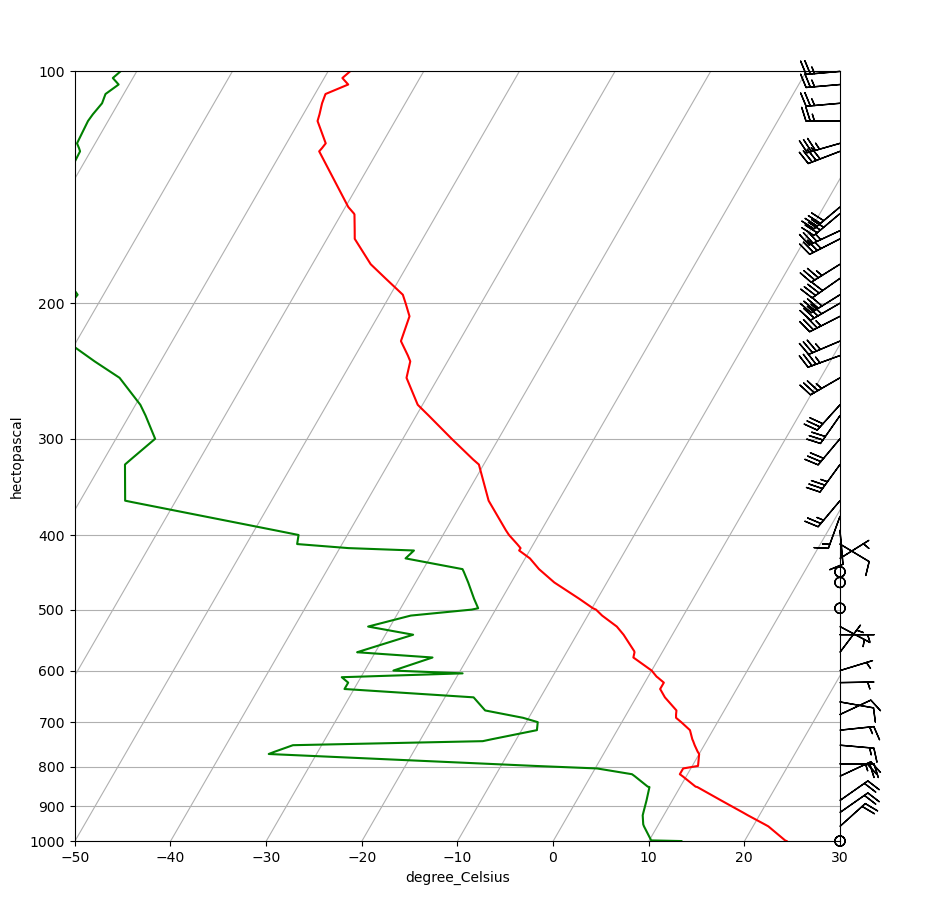

In [5]:
fig = plt.figure(figsize = (10, 10))
skew = plots.SkewT(fig)
skew.plot(p, T, 'red')
skew.plot(p, Td, 'green')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-50, 30)
skew.plot_barbs(p[idx], u[idx], v[idx])

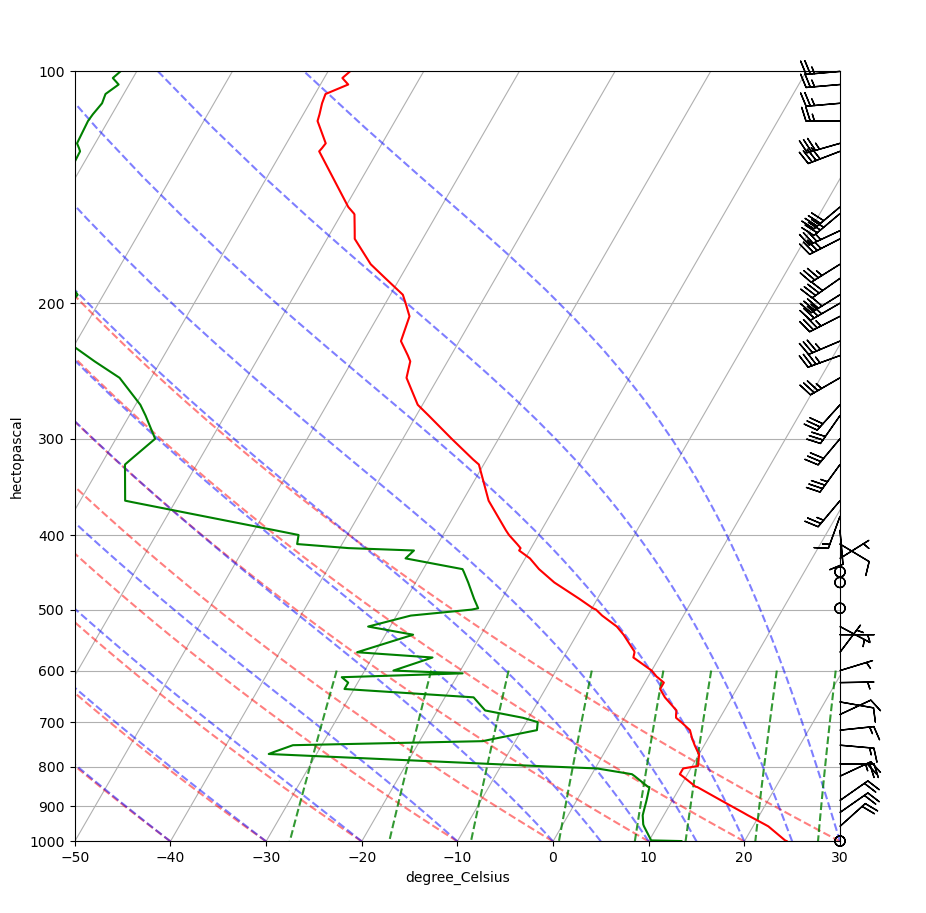

In [6]:
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
fig

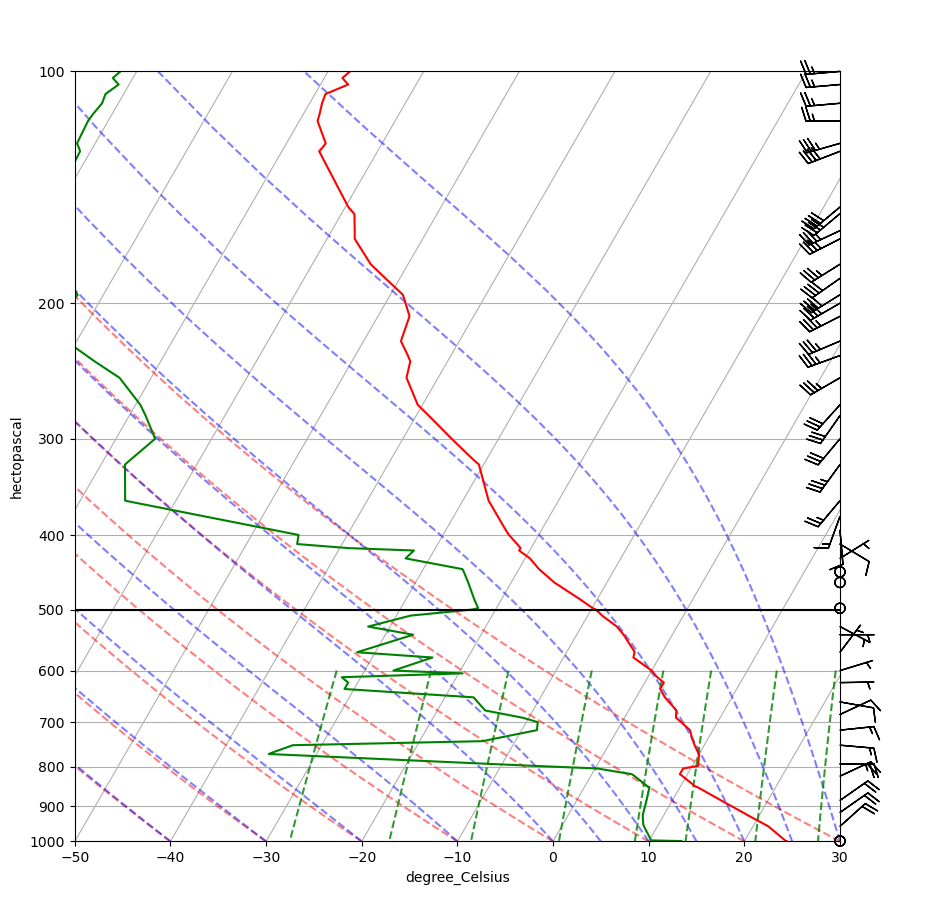

In [7]:
skew.ax.axhline(500 * units.hPa, color = 'k')
fig

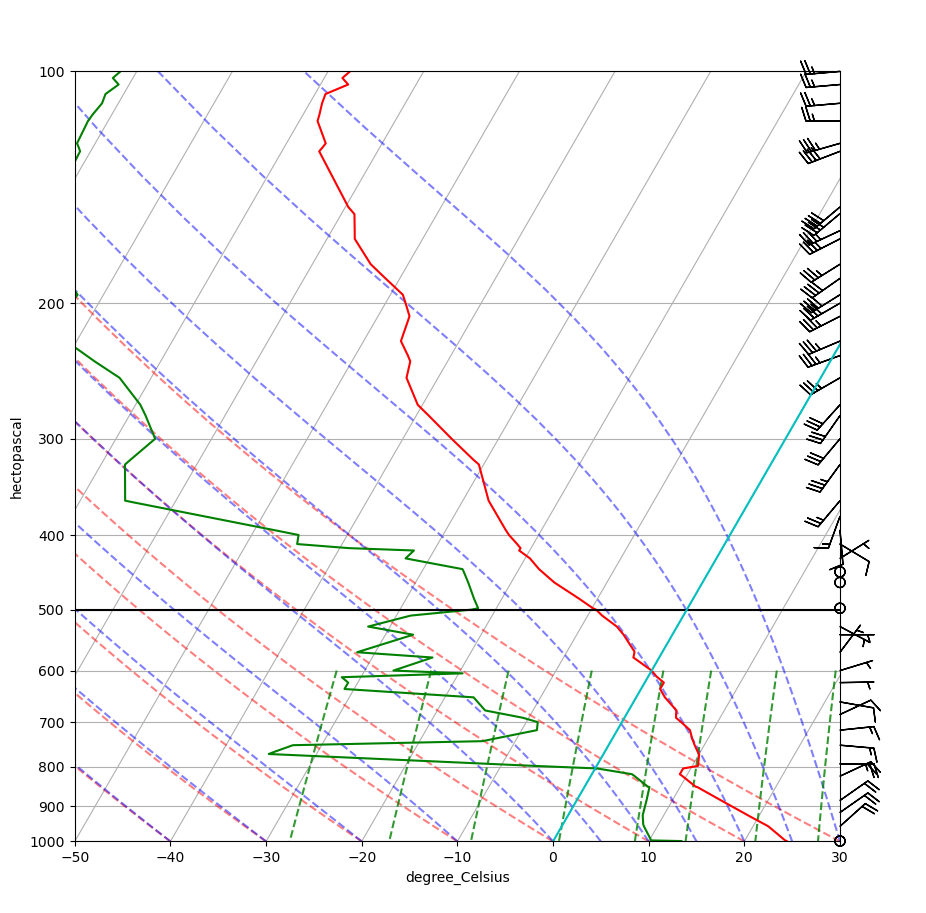

In [8]:
skew.ax.axvline(0 * units.degC, color = 'c')
fig